<a href="https://colab.research.google.com/github/zepedag/GraphTheory/blob/main/M%C3%A9xico_Teor%C3%ADa_de_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis infraesctructural de la conectividad de carreteras méxicanas usando teoría de grafos y su relación con el Sur-Sureste y el Tren Maya

Diana Laura Reyes Youshimatz 173391

Diego Rodriguez Gonzalez 163036

Humberto Alejandro Zepeda González 174653


# Introducción

En México, tanto a nivel nacional como internacional, el comercio es de gran importancia para el crecimiento económico y la generación de empleos. La importación y exportación de bienes, especialmente petróleo crudo y productos de consumo, son vitales en este aspecto. El transporte marítimo es uno de los medios más utilizados para estas operaciones, por lo que es esencial que los bienes lleguen a sus destinos en el menor tiempo posible.

La región Sur Sureste de México, compuesta por los estados de Campeche, Chiapas, Guerrero, Oaxaca, Puebla, Quintana Roo, Tabasco, Veracruz y Yucatán, es la segunda región más poblada del país después de la mesorregión Centro-País. A lo largo de la historia, esta región ha sido marginada por el gobierno y las élites económicas, lo que ha generado una falta de inversión en infraestructuras, servicios básicos y educación, y ha resultado en una situación de pobreza y marginación para la mayoría de la población, compuesta principalmente por campesinos y trabajadores del sector informal.

La falta de conectividad de la región con el resto del país es otro factor que ha contribuido al subdesarrollo en el Sur-Sureste de México, dificultando el acceso a los mercados y recursos necesarios para el desarrollo económico. Además, la presencia de grupos armados y el narcotráfico han generado inseguridad, lo que ha obstaculizado el desarrollo de actividades económicas y turísticas.

Con el fin de analizar las vías terrestres más eficientes para el transporte de productos, esta investigación utilizará grafos ponderados para representar las relaciones entre los nodos que son las capitales de los estados, los cinco puertos más importantes del país, la ruta más conveniente de los estados del Sur-Sureste con la frontera norte del país y su comparación con los estados con mayor IDH del país. Las aristas que los conectan tendrán pesos asignados según el camino necesario para llegar a los puntos de destino, considerando factores como la distancia y el tiempo.


# Limitaciones

Para calcular los pesos de los grafos se utilizo Google Maps como herramienta, por tanto aunque con teoría de grafos podemos visualizar y analizar la infraestructura de las carreteras existen ciertas limitaciones.

*   Presicion: Los datos de Google Maps pueden presentar variazaciones, lo cual puede afectar el analisis de los caminos; algunos caminos pueden estar marcados como transitables pero en realidad no lo son
*   Completitud: Puede que algunas rutas que existan no se encuentren en los planos de Google Maps, y no haber sido consideradas en este análisis

* Cambios en la infraestructura: La infraestructura de las carreteras suelen sufrir modificaciones, por que puede que los datos no esten completamente actualizados

* Limitaciones de la teoría de grafos: La teoría de grafos es una herramienta sumamente útil pero no puede tener en cuenta todos los factores relevantes, como las condiciones climáticas o la densidad del tráfico.





## Creación de un grafo

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd

def grafo(neighbors, weights):

    # Crear un nuevo grafo
    G = nx.Graph()

    # Agreagar nodos al grafo
    for node in neighbors:
        G.add_node(node)

    # Agregar vertices al grafo
    for edge, weight in weights.items():
        G.add_edge(edge[0], edge[1], weight=weight)

    nx.draw_spring(G, with_labels=True)

    # Calcular la matriz de adyacencia con pesos
    adj_matrix = nx.adjacency_matrix(G, weight='weight').toarray()

    # Crear un diccionario para mapear las etiquetas de los nodos con los índices
    label_dict = {node: i for i, node in enumerate(G.nodes())}

    # Establecer las etiquetas para la matriz de adyacencia
    adj_matrix_labels = np.empty(adj_matrix.shape, dtype=object)
    for i in range(adj_matrix.shape[0]):
        for j in range(adj_matrix.shape[1]):
            adj_matrix_labels[i, j] = f"{list(label_dict.keys())[i]} - {list(label_dict.keys())[j]}: {adj_matrix[i, j]}"

    # Calcular la lista de ayacencia con pesos
    adj_list = {}
    for node in G.nodes():
        adj_list[node] = []
        for neighbor, w in G[node].items():
            adj_list[node].append((neighbor, w['weight']))

    # Imprimir el grafo, matriz de adyacencia, lista de adyacencia con etiquetas
    print("Graph:")
    print(G.nodes())
    print(G.edges())
    print("Adjacency Matrix with Labels:")
    print(adj_matrix_labels)
    print("Adjacency List with Weights:")
    print(adj_list)


    return adj_matrix, label_dict


## Caminos mínimos

In [ ]:
import numpy as np
from typing import List, Tuple
from math import inf
from heapq import heappop, heappush

def shortest_path(adj_matrix: np.ndarray, label_dict: dict, state1: str, state2: str) -> Tuple[List[str], float]:
    # Convertir los nombres de los estados a índices usando label_dict
    idx1 = label_dict[state1]
    idx2 = label_dict[state2]

    # Inicializar distancias al infinito y el nodo inicial a 0
    dist = [inf] * len(adj_matrix)
    dist[idx1] = 0

    # Inicializar el heap con el nodo inicial
    heap = [(0, idx1)]

    # Inicializar el diccionario de nodos anterior
    prev = {}

    # Reemplazar 0 en la matriz de adyacencia con infinito
    adj_matrix[adj_matrix == 0] = inf

    # Algoritmo de Dijkstra
    while heap:
        d, u = heappop(heap)
        if d > dist[u]:
            continue
        for v, w in enumerate(adj_matrix[u]):
            if w != inf:
                alt = dist[u] + w
                if alt < dist[v]:
                    dist[v] = alt
                    prev[v] = u
                    heappush(heap, (alt, v))

    # Construir la ruta más corta del diccionario anterior
    path = []
    u = idx2
    while u in prev:
        path.insert(0, list(label_dict.keys())[u])
        u = prev[u]
    path.insert(0, list(label_dict.keys())[idx1])

    return path, dist[idx2]




### Correctitud del algoritmo (invariante de ciclo)
En el caso del algoritmo de Dijkstra, la invariante de ciclo podría ser la siguiente: en cada iteración, el árbol de caminos mínimos construido hasta ese momento es un subgrafo del grafo original y contiene únicamente los nodos que ya han sido visitados.

Para demostrar que este invariante es verdadero, se pueden distinguir dos casos:

Caso base: Al comienzo del algoritmo, el árbol de caminos mínimos es un conjunto vacío, que es un subgrafo del grafo original que contiene solamente los nodos visitados.

Paso inductivo: En cada iteración del ciclo, se selecciona el nodo con la distancia mínima hasta el nodo inicial y se agrega al árbol de caminos mínimos. Luego, se actualizan las distancias de los nodos adyacentes al nodo seleccionado y se continúa con la siguiente iteración. En cada iteración, el árbol de caminos mínimos se actualiza agregando un nuevo nodo, que es un subgrafo del grafo original y contiene solamente los nodos visitados.
Por lo tanto, en cada iteración del algoritmo de Dijkstra, el árbol de caminos mínimos es un subgrafo del grafo original y contiene únicamente los nodos visitados, lo que implica que el invariante de ciclo es verdadero.

Esto significa que, al finalizar el algoritmo, el árbol de caminos mínimos generado es un subgrafo del grafo original que contiene solamente los nodos visitados, y por lo tanto, incluye los caminos mínimos desde el nodo inicial a cada uno de los demás nodos del grafo. En resumen, se puede afirmar que el algoritmo de Dijkstra es correcto en términos de la construcción del árbol de caminos mínimos.



### Complejidad del algoritmo

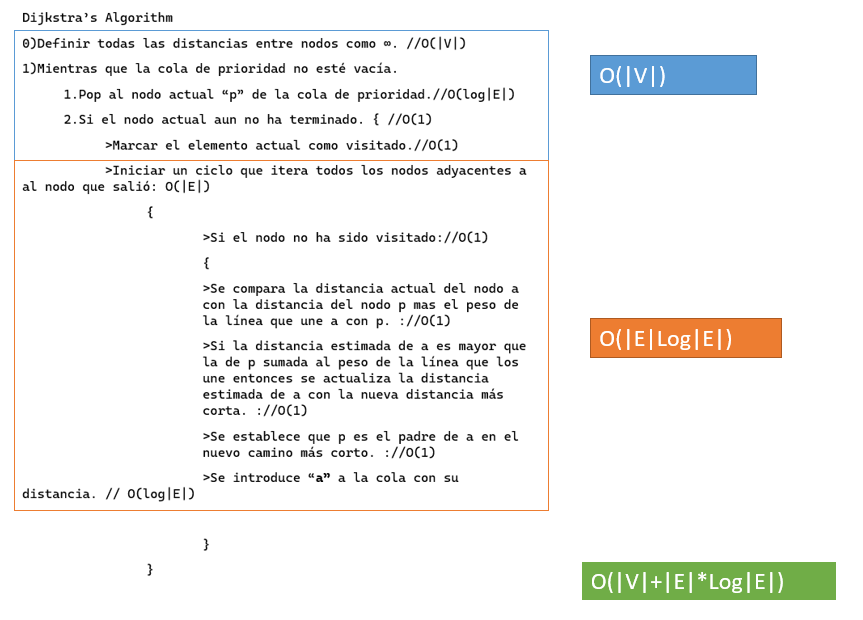

## Adyacencia de México

Utilizando un mapa topológico de la adyacencia entre estados, se obtuvieron las relaciones de colindancia, los estados que no contaran con un camino directo o requirieran de otro estado para llegar a su estado colindante fueron excluidos de estas relaciones.

In [ ]:
# lista de abreviaturas de estados en mexico
states = ["AGU", "BCN", "BCS", "CAM", "CHP", "CHH", "COA", "COL", "DUR", "GUA", "GRO", "HID", "JAL",
          "MEX", "MIC", "MOR", "NAY", "NLE", "OAX", "PUE", "QRO", "ROO", "SLP", "SIN", "SON", "TAB",
          "TAM", "TLA", "VER", "YUC", "ZAC","CDM","PMZ","PVZ","PLC","PAM","PEN"]

# inicialización de matriz de adyacencia
adj_matrix = [[0 for _ in range(len(states))] for _ in range(len(states))]

# diccionario de mapeo de abreviaturas de estado a índices en la matriz de adyacencia
state_indices = {state: i for i, state in enumerate(states)}
# lista de estados vecinos para cada estado
neighbors = {
    "AGU": ["ZAC", "JAL"],
    "BCN": ["PEN","SON","BCS"],
    "BCS": ["PEN","BCN"],
    "CAM": ["YUC", "ROO", "TAB"],
    "CHP": ["OAX", "PVZ", "TAB"],
    "CHH": ["DUR", "SON"],
    "COA": ["NLE", "DUR", "ZAC"],
    "COL": ["JAL","PMZ"],
    "DUR": ["CHH","COA","ZAC", "NAY","SIN"],
    "GUA": ["SLP", "JAL", "MIC"],
    "GRO": ["MIC", "OAX", "PUE","MOR","MEX","PLC"],
    "HID": ["QRO","TLA", "SLP"],
    "JAL": ["NAY", "ZAC", "AGU", "GUA", "COL","MIC"],
    "MEX": ["QRO","CDM","MOR","GRO","MIC" ],
    "MIC": ["GUA", "QRO", "MEX","PLC","JAL","GRO"],
    "MOR": ["MEX", "PUE", "GRO","CDM"],
    "NAY": ["JAL", "DUR", "SIN"],
    "NLE": ["TAM", "COA","SLP"],
    "OAX": ["CHP", "GRO", "PUE", "PVZ"],
    "PUE": ["MOR","GRO","CDM","PVZ", "OAX", "TLA", "VER"],
    "QRO": ["MIC","MEX", "SLP", "HID"],
    "ROO": ["CAM","YUC"],
    "SLP": ["ZAC","NLE","TAM" "GUA", "QRO", "HID","VER","PAM"],
    "SIN": ["DUR", "NAY", "SON"],
    "SON": ["CHH", "SIN","BCN"],
    "TAB": ["CAM", "CHP", "PVZ"],
    "TAM": ["NLE", "SLP","PAM"],
    "TLA": ["PUE","HID"],
    "CDM": ["MEX","MOR","PUE"],
    "VER": ["SLP","PUE","PVZ","PAM"],
    "YUC": ["CAM","ROO"],
    "ZAC": ["AGU", "DUR", "COA","JAL","SLP"],
    "PMZ": ["COL"],
    "PVZ": ["VER", "OAX","CHP","TAB", "PUE"],
    "PLC": ["MIC","GRO"],
    "PAM": ["TAM","VER","SLP"],
    "PEN": ["BCN","BCS"]
}

# Análisis de la infraestrucura de carreteras de México en distancias

## Distancias

In [ ]:
distancias = {
    ('AGU', 'ZAC'): 118,
    ('AGU', 'JAL'): 221,
    ('BCN', 'PEN'): 231,
    ('BCN', 'SON'): 933,
    ('BCN','BCS'): 1351,
    ('BCS', 'PEN'): 1410,
    ('CAM', 'YUC'): 177,
    ('CAM', 'ROO'): 418,
    ('CAM', 'TAB'): 384,
    ('CHP', 'OAX'): 540,
    ('CHP', 'PVZ'): 583,
    ('CHP', 'TAB'): 241,
   # ('CHH', 'COA'): 728, #durango necesario 200 km
    ('CHH', 'DUR'): 506,
    ('CHH', 'SON'): 1095,
  #  ('CHH', 'SIN'): 1080, #durango necesario
    ('COA', 'NLE'): 123,
    ('COA', 'DUR'): 506,
    ('COA', 'ZAC'): 385,
    #('COA', 'SLP'): 447,
    ('COL', 'JAL'): 194,
    ('COL', 'PMZ'): 99.4,
 #   ('COL', 'MIC'): 607, #jalisco necesario
    ('DUR', 'ZAC'): 291,
    ('DUR', 'NAY'): 485,
    ('DUR', 'SIN'): 462,
    ('GUA', 'SLP'): 187,
    #('GUA', 'ZAC'): 309, #aguascalientes necesario
    ('GUA', 'JAL'): 273,
    ('GUA', 'MIC'): 176,
    #('GUA', 'QRO'): 148,
    ('GRO', 'MIC'): 644,
    ('GRO', 'OAX'): 547,
    ('GRO', 'PUE'): 280,
    ('GRO', 'PLC'): 500,
    ('GRO', 'MOR'): 187,
    ('GRO', 'MEX'): 275,
    #('HID', 'PUE'): 148,#tlaxcala necesario
    #('HID', 'MEX'): 159,
    ('HID', 'QRO'): 224,
    ('HID', 'TLA'): 125,
    #('HID', 'VER'): 324,#Puebla necesario
    #('HID', 'CDM'): 90.8, Edo Mex necesario
    ('HID', 'SLP'): 424,
    #('HID', 'PAM'): 404,
    ('JAL', 'NAY'): 206,
    ('JAL', 'ZAC'): 321,
    ('JAL', 'MIC'): 288,
    ('MEX', 'QRO'): 171,
    ('MEX', 'CDM'): 96.2,
    ('MEX', 'MOR'): 166,
    #('MEX', 'PUE'): 195,
    ('MEX', 'TLA'): 134,
    ('MEX', 'MIC'): 220,
    ('MIC', 'QRO'): 189,
    ('MIC', 'PLC'): 321,
    ('MOR', 'PUE'): 138,
    ('MOR', 'CDM'): 87,
    #('NAY', 'ZAC'): 599, #Jalisco necesario
    ('NAY', 'SIN'): 638,
    ('NLE', 'TAM'): 310,
    ('NLE', 'SLP'): 516,
    ('OAX', 'PUE'): 340,
    ('OAX', 'PVZ'): 422,
    ('PUE', 'CDM'): 131,
    ('PUE', 'PVZ'): 279,
    ('PUE', 'TLA'): 39,
    ('PUE', 'VER'): 173,
    #('QRO', 'CDM'): 242, Edo. Mex necesario
    ('QRO', 'SLP'): 213,
    ('ROO', 'YUC'): 383,
    ('SLP', 'PAM'): 462,
    ('SLP', 'ZAC'): 194,
    ('SLP', 'TAM'): 331,
    ('SLP', 'VER'): 901,
    ('SIN', 'SON'): 690,
    ('TAB', 'PVZ'): 517,
    ('TAM', 'PAM'): 223,
    ('VER', 'PVZ'): 105,
    ('VER', 'PAM'): 494,
}


## Representación del grafo de distancias
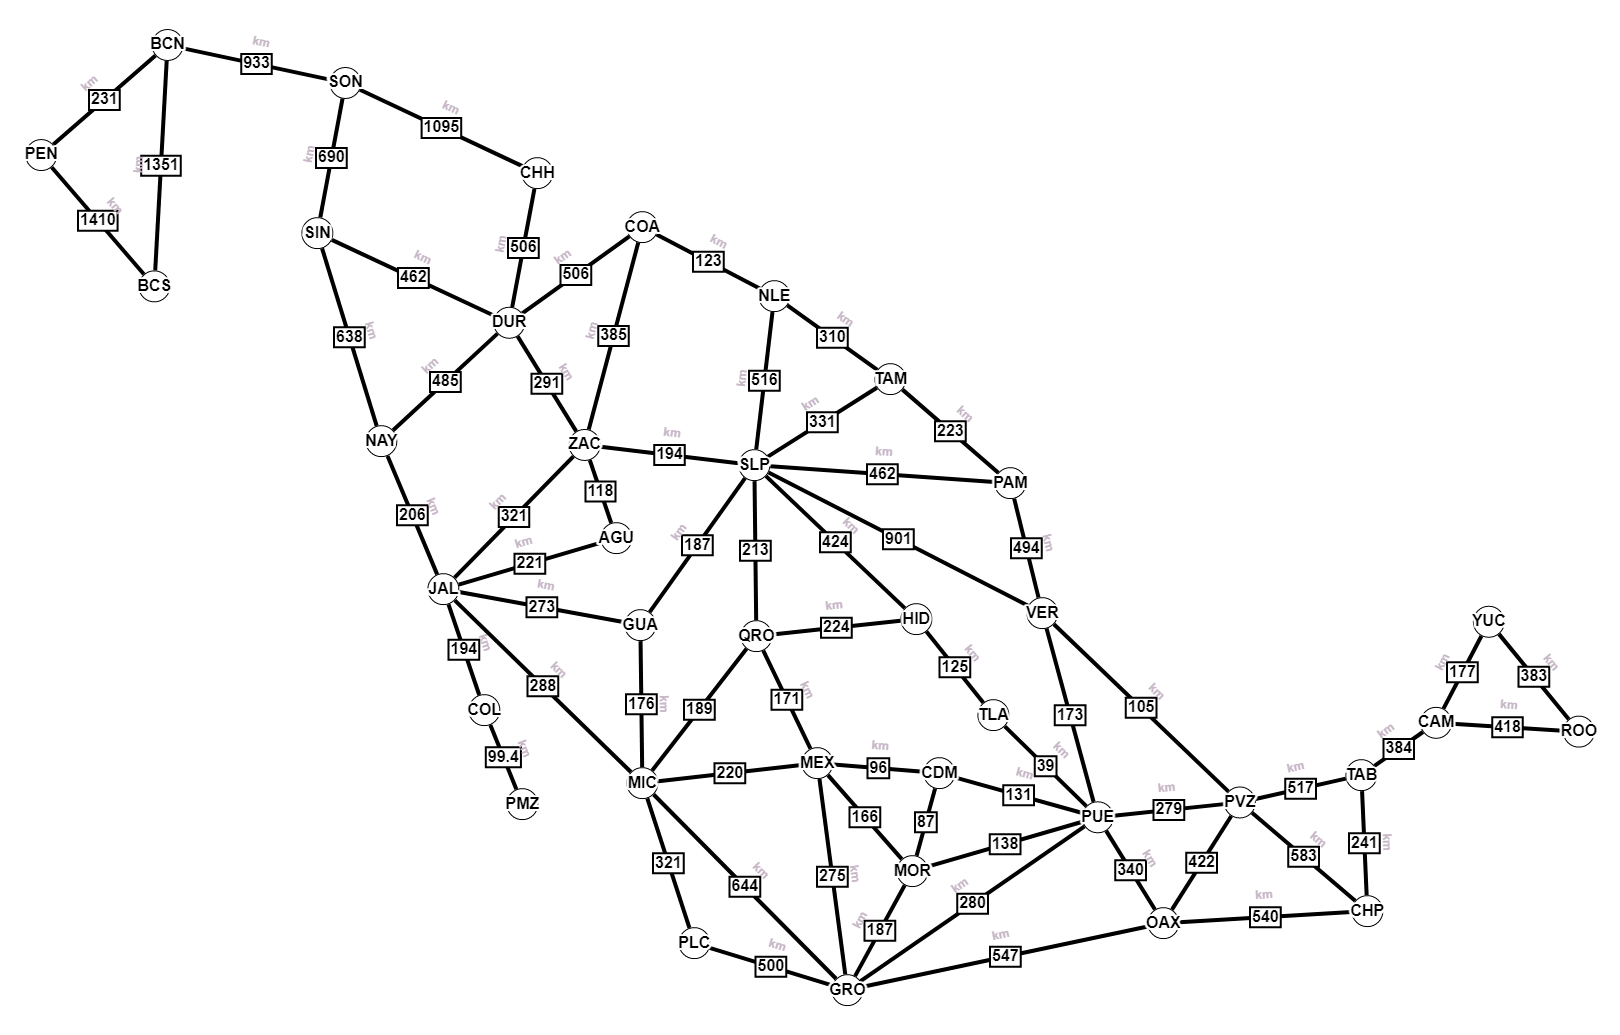

## Matriz y lista de adyacencia de distancias

Graph:
['AGU', 'BCN', 'BCS', 'CAM', 'CHP', 'CHH', 'COA', 'COL', 'DUR', 'GUA', 'GRO', 'HID', 'JAL', 'MEX', 'MIC', 'MOR', 'NAY', 'NLE', 'OAX', 'PUE', 'QRO', 'ROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAM', 'TLA', 'CDM', 'VER', 'YUC', 'ZAC', 'PMZ', 'PVZ', 'PLC', 'PAM', 'PEN']
[('AGU', 'ZAC'), ('AGU', 'JAL'), ('BCN', 'PEN'), ('BCN', 'SON'), ('BCN', 'BCS'), ('BCS', 'PEN'), ('CAM', 'YUC'), ('CAM', 'ROO'), ('CAM', 'TAB'), ('CHP', 'OAX'), ('CHP', 'PVZ'), ('CHP', 'TAB'), ('CHH', 'DUR'), ('CHH', 'SON'), ('COA', 'NLE'), ('COA', 'DUR'), ('COA', 'ZAC'), ('COL', 'JAL'), ('COL', 'PMZ'), ('DUR', 'ZAC'), ('DUR', 'NAY'), ('DUR', 'SIN'), ('GUA', 'SLP'), ('GUA', 'JAL'), ('GUA', 'MIC'), ('GRO', 'MIC'), ('GRO', 'OAX'), ('GRO', 'PUE'), ('GRO', 'PLC'), ('GRO', 'MOR'), ('GRO', 'MEX'), ('HID', 'QRO'), ('HID', 'TLA'), ('HID', 'SLP'), ('JAL', 'NAY'), ('JAL', 'ZAC'), ('JAL', 'MIC'), ('MEX', 'QRO'), ('MEX', 'CDM'), ('MEX', 'MOR'), ('MEX', 'TLA'), ('MEX', 'MIC'), ('MIC', 'QRO'), ('MIC', 'PLC'), ('MOR', 'PUE'), ('MOR', 'CDM

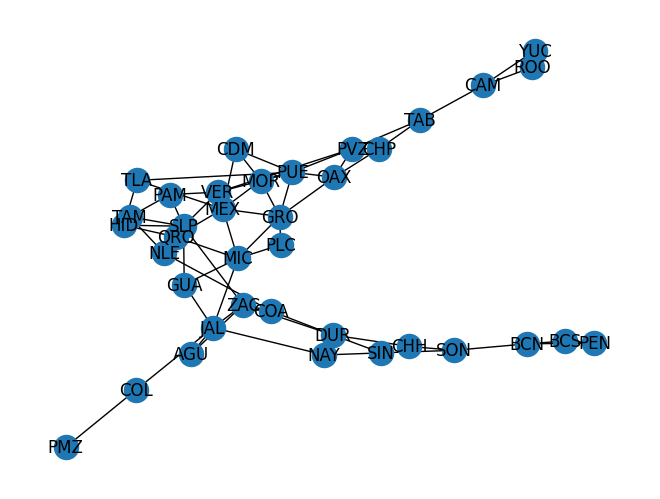

In [ ]:
adj_matrix, label_dict = grafo(neighbors, distancias)

## Caminos mínimos: distancias más cortas



### Infraestructura sur - sureste de México

#### Caminos mínimos entre los estados del sur sureste y los 5 puertos más importantes

Estados:
- Campeche, Chiapas, Guerrero, Oaxaca,Quintana Roo,
Tabasco, Yucatán

Puertos:
- Manzanillo, Lázaro Cárdenas, Veracruz, Altamira, Ensenada


In [ ]:
def south_port_paths(state):

  print(f"\n\n{state}","-","PMZ")
  path, distance = shortest_path(adj_matrix, label_dict, state, "PMZ")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n{state}","-","PLC")
  path, distance = shortest_path(adj_matrix, label_dict, state, "PLC")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n{state}","-","PVZ")
  path, distance = shortest_path(adj_matrix, label_dict, state, "PVZ")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n{state}","-","PAM")
  path, distance = shortest_path(adj_matrix, label_dict, state, "PAM")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n{state}","-","PEN")
  path, distance = shortest_path(adj_matrix, label_dict, state, "PEN")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

south_port_paths("CAM")
south_port_paths("CHP")
south_port_paths("GRO")
south_port_paths("OAX")
south_port_paths("ROO")
south_port_paths("TAB")
south_port_paths("YUC")



CAM - PMZ
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER', 'PUE', 'TLA', 'MEX', 'MIC', 'JAL', 'COL', 'PMZ']
Distancia: 2153.4

CAM - PLC
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER', 'PUE', 'TLA', 'MEX', 'MIC', 'PLC']
Distancia: 1893.0

CAM - PVZ
Camino mínimo: ['CAM', 'TAB', 'PVZ']
Distancia: 901.0

CAM - PAM
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER', 'PAM']
Distancia: 1500.0

CAM - PEN
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER', 'PUE', 'TLA', 'MEX', 'QRO', 'SLP', 'ZAC', 'DUR', 'SIN', 'SON', 'BCN', 'PEN']
Distancia: 4537.0


CHP - PMZ
Camino mínimo: ['CHP', 'PVZ', 'VER', 'PUE', 'TLA', 'MEX', 'MIC', 'JAL', 'COL', 'PMZ']
Distancia: 1835.4

CHP - PLC
Camino mínimo: ['CHP', 'PVZ', 'VER', 'PUE', 'TLA', 'MEX', 'MIC', 'PLC']
Distancia: 1575.0

CHP - PVZ
Camino mínimo: ['CHP', 'PVZ']
Distancia: 583.0

CHP - PAM
Camino mínimo: ['CHP', 'PVZ', 'VER', 'PAM']
Distancia: 1182.0

CHP - PEN
Camino mínimo: ['CHP', 'PVZ', 'VER', 'PUE', 'TLA', 'MEX', 'QRO', 'SLP', 'ZAC', 'DUR', 'SIN', 'SON', 'BCN', 'PEN']
D

#### Caminos mínimos entre los estados del sur-sureste y la frontera norte más cercana.

La frontera norte más cercana se encuentra en el estado de Tamaulipas

In [ ]:
def south_north_border(state):
  print(f"\n\n{state}","-","TAM")
  path, distance = shortest_path(adj_matrix, label_dict, state, "TAM")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

south_north_border("CAM")
south_north_border("CHP")
south_north_border("GRO")
south_north_border("OAX")
south_north_border("QRO")
south_north_border("TAB")
south_north_border("YUC")



CAM - TAM
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER', 'PAM', 'TAM']
Distancia: 1723.0


CHP - TAM
Camino mínimo: ['CHP', 'PVZ', 'VER', 'PAM', 'TAM']
Distancia: 1405.0


GRO - TAM
Camino mínimo: ['GRO', 'MEX', 'QRO', 'SLP', 'TAM']
Distancia: 990.0


OAX - TAM
Camino mínimo: ['OAX', 'PUE', 'TLA', 'MEX', 'QRO', 'SLP', 'TAM']
Distancia: 1228.0


QRO - TAM
Camino mínimo: ['QRO', 'SLP', 'TAM']
Distancia: 544.0


TAB - TAM
Camino mínimo: ['TAB', 'PVZ', 'VER', 'PAM', 'TAM']
Distancia: 1339.0


YUC - TAM
Camino mínimo: ['YUC', 'CAM', 'TAB', 'PVZ', 'VER', 'PAM', 'TAM']
Distancia: 1900.0


#### Caminos mínimos entre los estados del sur-sureste y los 4 estados más poblados

- Estado de México, Ciudad
de México, Jalisco, Veracruz

In [ ]:
def south_populated_states(state):
  print(f"\n\n{state}","-","MEX")
  path, distance = shortest_path(adj_matrix, label_dict, state, "MEX")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n\n{state}","-","CDM")
  path, distance = shortest_path(adj_matrix, label_dict, state, "CDM")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n\n{state}","-","JAL")
  path, distance = shortest_path(adj_matrix, label_dict, state, "JAL")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n\n{state}","-","VER")
  path, distance = shortest_path(adj_matrix, label_dict, state, "VER")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

south_populated_states("CAM")
south_populated_states("CHP")
south_populated_states("GRO")
south_populated_states("OAX")
south_populated_states("ROO")
south_populated_states("TAB")
south_populated_states("YUC")



CAM - MEX
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER', 'PUE', 'TLA', 'MEX']
Distancia: 1352.0


CAM - CDM
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER', 'PUE', 'CDM']
Distancia: 1310.0


CAM - JAL
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER', 'PUE', 'TLA', 'MEX', 'MIC', 'JAL']
Distancia: 1860.0


CAM - VER
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER']
Distancia: 1006.0


CHP - MEX
Camino mínimo: ['CHP', 'PVZ', 'VER', 'PUE', 'TLA', 'MEX']
Distancia: 1034.0


CHP - CDM
Camino mínimo: ['CHP', 'PVZ', 'VER', 'PUE', 'CDM']
Distancia: 992.0


CHP - JAL
Camino mínimo: ['CHP', 'PVZ', 'VER', 'PUE', 'TLA', 'MEX', 'MIC', 'JAL']
Distancia: 1542.0


CHP - VER
Camino mínimo: ['CHP', 'PVZ', 'VER']
Distancia: 688.0


GRO - MEX
Camino mínimo: ['GRO', 'MEX']
Distancia: 275.0


GRO - CDM
Camino mínimo: ['GRO', 'MOR', 'CDM']
Distancia: 274.0


GRO - JAL
Camino mínimo: ['GRO', 'MEX', 'MIC', 'JAL']
Distancia: 783.0


GRO - VER
Camino mínimo: ['GRO', 'PUE', 'VER']
Distancia: 453.0


OAX - MEX
Camino mínimo: ['OAX',

### Comparación con los 5 estados con mayor IDH

- Estados:
CDMX, Nuevo León, Baja California, Aguascalientes, Baja
California Sur.


#### Caminos mínimos entre los con mayor IDH y los 5 puertos más importantes

In [ ]:
south_port_paths("CDM")
south_port_paths("NLE")
south_port_paths("BCN")
south_port_paths("AGU")
south_port_paths("BCS")



CDM - PMZ
Camino mínimo: ['CDM', 'MEX', 'MIC', 'JAL', 'COL', 'PMZ']
Distancia: 897.6

CDM - PLC
Camino mínimo: ['CDM', 'MEX', 'MIC', 'PLC']
Distancia: 637.2

CDM - PVZ
Camino mínimo: ['CDM', 'PUE', 'VER', 'PVZ']
Distancia: 409.0

CDM - PAM
Camino mínimo: ['CDM', 'PUE', 'VER', 'PAM']
Distancia: 798.0

CDM - PEN
Camino mínimo: ['CDM', 'MEX', 'QRO', 'SLP', 'ZAC', 'DUR', 'SIN', 'SON', 'BCN', 'PEN']
Distancia: 3281.2


NLE - PMZ
Camino mínimo: ['NLE', 'COA', 'ZAC', 'JAL', 'COL', 'PMZ']
Distancia: 1122.4

NLE - PLC
Camino mínimo: ['NLE', 'SLP', 'GUA', 'MIC', 'PLC']
Distancia: 1200.0

NLE - PVZ
Camino mínimo: ['NLE', 'TAM', 'PAM', 'VER', 'PVZ']
Distancia: 1132.0

NLE - PAM
Camino mínimo: ['NLE', 'TAM', 'PAM']
Distancia: 533.0

NLE - PEN
Camino mínimo: ['NLE', 'COA', 'DUR', 'SIN', 'SON', 'BCN', 'PEN']
Distancia: 2945.0


BCN - PMZ
Camino mínimo: ['BCN', 'SON', 'SIN', 'NAY', 'JAL', 'COL', 'PMZ']
Distancia: 2760.4

BCN - PLC
Camino mínimo: ['BCN', 'SON', 'SIN', 'NAY', 'JAL', 'MIC', 'PLC']
Dist

#### Caminos mínimos entre los estados con mayor IDH y la frontera norte más cercana

Se excluye Baja California y Nuevo León dado que ambos estados tienen colindancia con la frontera norte del país

In [ ]:
south_north_border("CDM")

print(f"\nAGU-NLE")
path, distance = shortest_path(adj_matrix, label_dict, "AGU", "NLE")
print(f"Shortest path: {path}")
print(f"Distance: {distance}")

print(f"\nBCS-BCN")
path, distance = shortest_path(adj_matrix, label_dict, "BCS", "BCN")
print(f"Shortest path: {path}")
print(f"Distance: {distance}")




CDM - TAM
Camino mínimo: ['CDM', 'MEX', 'QRO', 'SLP', 'TAM']
Distancia: 811.2

AGU-NLE
Shortest path: ['AGU', 'ZAC', 'COA', 'NLE']
Distance: 626.0

BCS-BCN
Shortest path: ['BCS', 'BCN']
Distance: 1351.0


#### Caminos mínimos entre los estados con mayor IDH y los 4 estados más poblados

- Estado de México, Ciudad
de México, Jalisco, Veracruz

In [ ]:
south_populated_states("CDM")
south_populated_states("NLE")
south_populated_states("BCN")
south_populated_states("AGU")
south_populated_states("BCS")



CDM - MEX
Camino mínimo: ['CDM', 'MEX']
Distancia: 96.2


CDM - CDM
Camino mínimo: ['CDM']
Distancia: 0


CDM - JAL
Camino mínimo: ['CDM', 'MEX', 'MIC', 'JAL']
Distancia: 604.2


CDM - VER
Camino mínimo: ['CDM', 'PUE', 'VER']
Distancia: 304.0


NLE - MEX
Camino mínimo: ['NLE', 'SLP', 'QRO', 'MEX']
Distancia: 900.0


NLE - CDM
Camino mínimo: ['NLE', 'SLP', 'QRO', 'MEX', 'CDM']
Distancia: 996.2


NLE - JAL
Camino mínimo: ['NLE', 'COA', 'ZAC', 'JAL']
Distancia: 829.0


NLE - VER
Camino mínimo: ['NLE', 'TAM', 'PAM', 'VER']
Distancia: 1027.0


BCN - MEX
Camino mínimo: ['BCN', 'SON', 'SIN', 'DUR', 'ZAC', 'SLP', 'QRO', 'MEX']
Distancia: 2954.0


BCN - CDM
Camino mínimo: ['BCN', 'SON', 'SIN', 'DUR', 'ZAC', 'SLP', 'QRO', 'MEX', 'CDM']
Distancia: 3050.2


BCN - JAL
Camino mínimo: ['BCN', 'SON', 'SIN', 'NAY', 'JAL']
Distancia: 2467.0


BCN - VER
Camino mínimo: ['BCN', 'SON', 'SIN', 'DUR', 'ZAC', 'SLP', 'QRO', 'MEX', 'TLA', 'PUE', 'VER']
Distancia: 3300.0


AGU - MEX
Camino mínimo: ['AGU', 'ZAC'

# Análisis de la infraestrucura de carreteras de México en tiempo

## Tiempos

In [ ]:
tiempos = {
    ('AGU', 'ZAC'): 1.37,
    ('AGU', 'JAL'): 2.44,
    ('BCN', 'PEN'): 3.04,
    ('BCN', 'SON'): 10.41,
    ('BCN','BCS'): 16,
    ('BCS', 'PEN'): 17.19,
    ('CAM', 'YUC'): 2.25,
    ('CAM', 'ROO'): 5.28,
    ('CAM', 'TAB'): 5.14,
    ('CHP', 'OAX'): 8.19,
    ('CHP', 'PVZ'): 6.51,
    ('CHP', 'TAB'): 3.28,
    #('CHH', 'COA'): 7.38, # durango necesario
    ('CHH', 'DUR'): 5.06,
    ('CHH', 'SON'): 12.24,
    #('CHH', 'SIN'): 12.34, #durango necesario
    ('COA', 'NLE'): 1.4,
    ('COA', 'DUR'): 5.2,
    ('COA', 'ZAC'): 4.14,
    #('COA', 'SLP'): 4.59,
    ('COL', 'JAL'): 2.4,
    ('COL', 'PMZ'): 1.15,
    #('COL', 'MIC'): 10.5, #jalisco necesario
    ('DUR', 'ZAC'): 3.29,
    ('DUR', 'NAY'): 10,
    ('DUR', 'SIN'): 5.4,
    ('GUA', 'SLP'): 2.28,
    #('GUA', 'ZAC'): 3.41, #aguascalientes necesario
    ('GUA', 'JAL'): 3.13,
    ('GUA', 'MIC'): 2.24,
    #('GUA', 'QRO'): 1.59,
    ('GRO', 'MIC'): 11.46,
    ('GRO', 'OAX'): 11.42,
    ('GRO', 'PUE'): 10.25,
    ('GRO', 'MOR'): 2.13,
    ('GRO', 'MEX'): 3.21,
    ('GRO', 'PLC'): 6.32,
    #('HID', 'PUE'): 2.11, #Tlaxcala puebla
    #('HID', 'MEX'): 2.22,
    ('HID', 'QRO'): 3.31,
    ('HID', 'TLA'): 1.40,
    #('HID', 'VER'): 4.32,#Puebla necesario
    #('HID', 'CDM'): 1.35,
    ('HID', 'SLP'): 5.26,
    #('HID', 'PAM'): 5.35,
    ('JAL', 'NAY'): 2.52,
    ('JAL', 'ZAC'): 5.9,
    ('JAL', 'MIC'): 3.23,
    ('MEX', 'QRO'): 2.30,
    ('MEX', 'CDM'): 1.54,
    ('MEX', 'MOR'): 2.31,
    #('MEX', 'PUE'): 3.40,
    ('MEX', 'TLA'): 2.08,
    ('MEX', 'MIC'): 2.43,
    ('MIC', 'QRO'): 2.22,
    ('MIC', 'PLC'): 4.03,
    ('MOR', 'PUE'): 1.59,
    ('MOR', 'CDM'): 1.2,
    #('NAY', 'ZAC'): 9.25,#Jalisco necesario
    ('NLE', 'TAM'): 3.51,
    ('NLE', 'SLP'): 6.13,
    ('OAX', 'PVZ'): 8.55,
    ('OAX', 'PUE'): 4.24,
    ('PUE', 'CDM'): 2,
    ('PUE', 'PVZ'): 3.43,
    ('PUE', 'TLA'): 50,
    ('PUE', 'VER'): 2.26,
    #('QRO', 'CDM'): 5.8, edo mex necesario
    ('QRO', 'SLP'): 2.31 ,
    ('ROO', 'YUC'): 5,
    ('SLP', 'PAM'): 6,
    ('SLP', 'ZAC'): 2.19,
    ('SLP', 'TAM'): 4.02,
    ('SLP', 'VER'): 13.52,
    ('SIN', 'SON'): 8.25,
    ('TAB', 'PVZ'): 7,
    #('TAM', 'VER'): 8.46,
    ('TAM', 'PAM'): 2.35,
    #('TLA', 'CDM'): 2,
    ('VER', 'PVZ'): 1.25,
    ('VER', 'PAM'): 6.3,
}

## Representación del grafo de tiempos
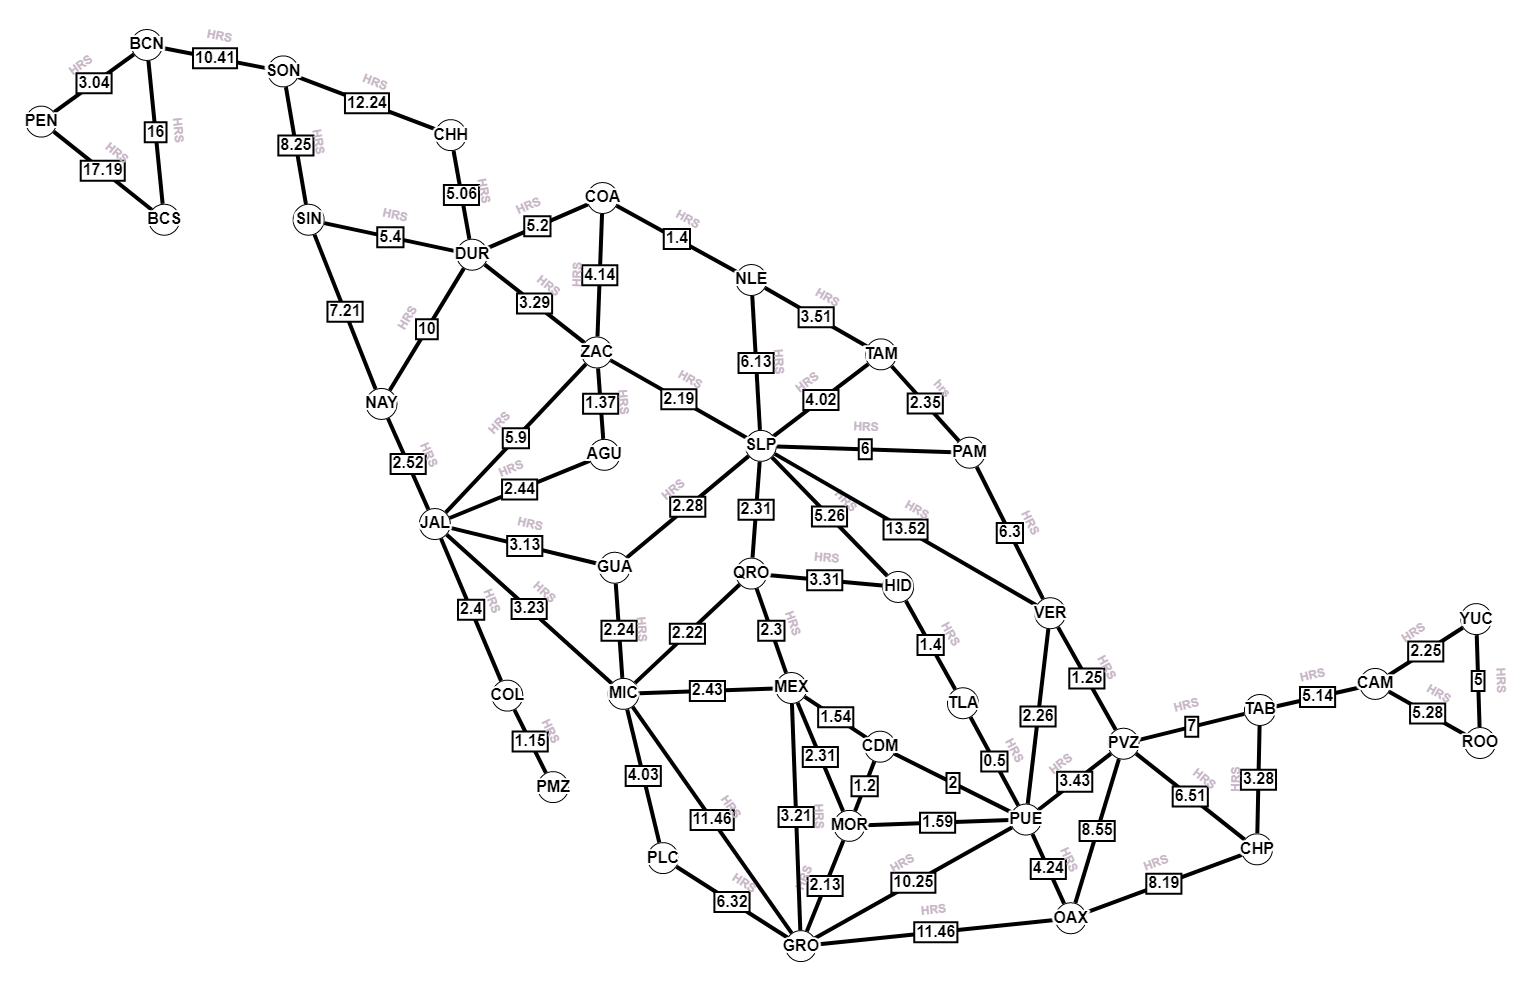


## Matriz y lista de adyacencia de tiempos

Grafo tiempos
Graph:
['AGU', 'BCN', 'BCS', 'CAM', 'CHP', 'CHH', 'COA', 'COL', 'DUR', 'GUA', 'GRO', 'HID', 'JAL', 'MEX', 'MIC', 'MOR', 'NAY', 'NLE', 'OAX', 'PUE', 'QRO', 'ROO', 'SLP', 'SIN', 'SON', 'TAB', 'TAM', 'TLA', 'CDM', 'VER', 'YUC', 'ZAC', 'PMZ', 'PVZ', 'PLC', 'PAM', 'PEN']
[('AGU', 'ZAC'), ('AGU', 'JAL'), ('BCN', 'PEN'), ('BCN', 'SON'), ('BCN', 'BCS'), ('BCS', 'PEN'), ('CAM', 'YUC'), ('CAM', 'ROO'), ('CAM', 'TAB'), ('CHP', 'OAX'), ('CHP', 'PVZ'), ('CHP', 'TAB'), ('CHH', 'DUR'), ('CHH', 'SON'), ('COA', 'NLE'), ('COA', 'DUR'), ('COA', 'ZAC'), ('COL', 'JAL'), ('COL', 'PMZ'), ('DUR', 'ZAC'), ('DUR', 'NAY'), ('DUR', 'SIN'), ('GUA', 'SLP'), ('GUA', 'JAL'), ('GUA', 'MIC'), ('GRO', 'MIC'), ('GRO', 'OAX'), ('GRO', 'PUE'), ('GRO', 'MOR'), ('GRO', 'MEX'), ('GRO', 'PLC'), ('HID', 'QRO'), ('HID', 'TLA'), ('HID', 'SLP'), ('JAL', 'NAY'), ('JAL', 'ZAC'), ('JAL', 'MIC'), ('MEX', 'QRO'), ('MEX', 'CDM'), ('MEX', 'MOR'), ('MEX', 'TLA'), ('MEX', 'MIC'), ('MIC', 'QRO'), ('MIC', 'PLC'), ('MOR', 'PUE')

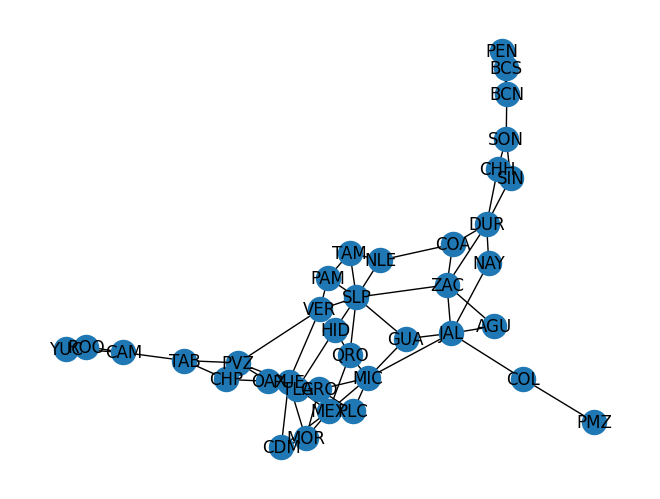

In [ ]:
np.set_printoptions(threshold=np.inf)
print("Grafo tiempos")
adj_matrix, label_dict = grafo(neighbors, tiempos)

## Caminos mínimos: Tiempos más cortos

### Infraestructura sur - sureste de México

##### Caminos mínimos entre los estados del sur sureste y los 5 puertos más importantes

(Campeche, Chiapas, Guerrero, Oaxaca,Quintana Roo,
Tabasco, Yucatán)

In [ ]:
def south_port_paths(state):

  print(f"\n\n{state}","-","PMZ")
  path, distance = shortest_path(adj_matrix, label_dict, state, "PMZ")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n{state}","-","PLC")
  path, distance = shortest_path(adj_matrix, label_dict, state, "PLC")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n{state}","-","PVZ")
  path, distance = shortest_path(adj_matrix, label_dict, state, "PVZ")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n{state}","-","PAM")
  path, distance = shortest_path(adj_matrix, label_dict, state, "PAM")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

  print(f"\n{state}","-","PEN")
  path, distance = shortest_path(adj_matrix, label_dict, state, "PEN")
  print(f"Camino mínimo: {path}")
  print(f"Distancia: {distance}")

south_port_paths("CAM")
south_port_paths("CHP")
south_port_paths("GRO")
south_port_paths("OAX")
south_port_paths("ROO")
south_port_paths("TAB")
south_port_paths("YUC")



CAM - PMZ
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'PUE', 'CDM', 'MEX', 'MIC', 'JAL', 'COL', 'PMZ']
Distancia: 28.319999999999997

CAM - PLC
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'PUE', 'CDM', 'MEX', 'MIC', 'PLC']
Distancia: 25.57

CAM - PVZ
Camino mínimo: ['CAM', 'TAB', 'PVZ']
Distancia: 12.14

CAM - PAM
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER', 'PAM']
Distancia: 19.69

CAM - PEN
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'PUE', 'CDM', 'MEX', 'QRO', 'SLP', 'ZAC', 'DUR', 'SIN', 'SON', 'BCN', 'PEN']
Distancia: 56.300000000000004


CHP - PMZ
Camino mínimo: ['CHP', 'PVZ', 'PUE', 'CDM', 'MEX', 'MIC', 'JAL', 'COL', 'PMZ']
Distancia: 22.689999999999998

CHP - PLC
Camino mínimo: ['CHP', 'PVZ', 'PUE', 'CDM', 'MEX', 'MIC', 'PLC']
Distancia: 19.94

CHP - PVZ
Camino mínimo: ['CHP', 'PVZ']
Distancia: 6.51

CHP - PAM
Camino mínimo: ['CHP', 'PVZ', 'VER', 'PAM']
Distancia: 14.059999999999999

CHP - PEN
Camino mínimo: ['CHP', 'PVZ', 'PUE', 'CDM', 'MEX', 'QRO', 'SLP', 'ZAC', 'DUR', 'SIN', 'SON', 'BCN', 'PEN']

#### Caminos mínimos entre los estados del sursureste y la frontera norte más cercana.

In [ ]:
south_north_border("CAM")
south_north_border("CHP")
south_north_border("GRO")
south_north_border("OAX")
south_north_border("QRO")
south_north_border("TAB")
south_north_border("YUC")



CAM - TAM
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER', 'PAM', 'TAM']
Distancia: 22.040000000000003


CHP - TAM
Camino mínimo: ['CHP', 'PVZ', 'VER', 'PAM', 'TAM']
Distancia: 16.41


GRO - TAM
Camino mínimo: ['GRO', 'MEX', 'QRO', 'SLP', 'TAM']
Distancia: 11.84


OAX - TAM
Camino mínimo: ['OAX', 'PUE', 'VER', 'PAM', 'TAM']
Distancia: 15.15


QRO - TAM
Camino mínimo: ['QRO', 'SLP', 'TAM']
Distancia: 6.33


TAB - TAM
Camino mínimo: ['TAB', 'PVZ', 'VER', 'PAM', 'TAM']
Distancia: 16.900000000000002


YUC - TAM
Camino mínimo: ['YUC', 'CAM', 'TAB', 'PVZ', 'VER', 'PAM', 'TAM']
Distancia: 24.290000000000003


#### Caminos mínimos entre los estados del sur-sureste y los 4 estados más poblados

- Estado de México, Ciudad
de México, Jalisco, Veracruz

In [ ]:
south_populated_states("CAM")
south_populated_states("CHP")
south_populated_states("GRO")
south_populated_states("OAX")
south_populated_states("ROO")
south_populated_states("TAB")
south_populated_states("YUC")



CAM - MEX
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'PUE', 'CDM', 'MEX']
Distancia: 19.11


CAM - CDM
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'PUE', 'CDM']
Distancia: 17.57


CAM - JAL
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'PUE', 'CDM', 'MEX', 'MIC', 'JAL']
Distancia: 24.77


CAM - VER
Camino mínimo: ['CAM', 'TAB', 'PVZ', 'VER']
Distancia: 13.39


CHP - MEX
Camino mínimo: ['CHP', 'PVZ', 'PUE', 'CDM', 'MEX']
Distancia: 13.48


CHP - CDM
Camino mínimo: ['CHP', 'PVZ', 'PUE', 'CDM']
Distancia: 11.94


CHP - JAL
Camino mínimo: ['CHP', 'PVZ', 'PUE', 'CDM', 'MEX', 'MIC', 'JAL']
Distancia: 19.14


CHP - VER
Camino mínimo: ['CHP', 'PVZ', 'VER']
Distancia: 7.76


GRO - MEX
Camino mínimo: ['GRO', 'MEX']
Distancia: 3.21


GRO - CDM
Camino mínimo: ['GRO', 'MOR', 'CDM']
Distancia: 3.33


GRO - JAL
Camino mínimo: ['GRO', 'MEX', 'MIC', 'JAL']
Distancia: 8.870000000000001


GRO - VER
Camino mínimo: ['GRO', 'MOR', 'PUE', 'VER']
Distancia: 5.9799999999999995


OAX - MEX
Camino mínimo: ['OAX', 'PUE', 'CDM', 'MEX

### Comparación con los 5 estados con mayor IDH

- CDMX, Nuevo León, Baja California, Aguascalientes, Baja
California Sur.



#### Caminos mínimos entre los con mayor IDH y los 5 puertos más importantes

In [ ]:
south_port_paths("CDM")
south_port_paths("NLE")
south_port_paths("BCN")
south_port_paths("AGU")
south_port_paths("BCS")



CDM - PMZ
Camino mínimo: ['CDM', 'MEX', 'MIC', 'JAL', 'COL', 'PMZ']
Distancia: 10.75

CDM - PLC
Camino mínimo: ['CDM', 'MEX', 'MIC', 'PLC']
Distancia: 8.0

CDM - PVZ
Camino mínimo: ['CDM', 'PUE', 'PVZ']
Distancia: 5.43

CDM - PAM
Camino mínimo: ['CDM', 'PUE', 'VER', 'PAM']
Distancia: 10.559999999999999

CDM - PEN
Camino mínimo: ['CDM', 'MEX', 'QRO', 'SLP', 'ZAC', 'DUR', 'SIN', 'SON', 'BCN', 'PEN']
Distancia: 38.73


NLE - PMZ
Camino mínimo: ['NLE', 'COA', 'ZAC', 'AGU', 'JAL', 'COL', 'PMZ']
Distancia: 12.9

NLE - PLC
Camino mínimo: ['NLE', 'SLP', 'GUA', 'MIC', 'PLC']
Distancia: 14.68

NLE - PVZ
Camino mínimo: ['NLE', 'TAM', 'PAM', 'VER', 'PVZ']
Distancia: 13.41

NLE - PAM
Camino mínimo: ['NLE', 'TAM', 'PAM']
Distancia: 5.859999999999999

NLE - PEN
Camino mínimo: ['NLE', 'COA', 'DUR', 'SIN', 'SON', 'BCN', 'PEN']
Distancia: 33.7


BCN - PMZ
Camino mínimo: ['BCN', 'SON', 'SIN', 'DUR', 'ZAC', 'AGU', 'JAL', 'COL', 'PMZ']
Distancia: 34.71

BCN - PLC
Camino mínimo: ['BCN', 'SON', 'SIN', 'DUR

#### Caminos mínimos entre los estados con mayor IDH y la frontera norte más cercana

Se excluye Baja California y Nuevo León dado que ambos estados tienen colindancia con la frontera norte del país

In [ ]:
south_north_border("CDM")

print(f"\nAGU-NLE")
path, distance = shortest_path(adj_matrix, label_dict, "AGU", "NLE")
print(f"Shortest path: {path}")
print(f"Distance: {distance}")

print(f"\nBCS-BCN")
path, distance = shortest_path(adj_matrix, label_dict, "BCS", "BCN")
print(f"Shortest path: {path}")
print(f"Distance: {distance}")




CDM - TAM
Camino mínimo: ['CDM', 'MEX', 'QRO', 'SLP', 'TAM']
Distancia: 10.17

AGU-NLE
Shortest path: ['AGU', 'ZAC', 'COA', 'NLE']
Distance: 6.91

BCS-BCN
Shortest path: ['BCS', 'BCN']
Distance: 16.0


#### Caminos mínimos entre los estados con mayor IDH y los 4 estados más poblados

- Estado de México, Ciudad
de México, Jalisco, Veracruz

In [ ]:
south_populated_states("CDM")
south_populated_states("NLE")
south_populated_states("BCN")
south_populated_states("AGU")
south_populated_states("BCS")



CDM - MEX
Camino mínimo: ['CDM', 'MEX']
Distancia: 1.54


CDM - CDM
Camino mínimo: ['CDM']
Distancia: 0


CDM - JAL
Camino mínimo: ['CDM', 'MEX', 'MIC', 'JAL']
Distancia: 7.2


CDM - VER
Camino mínimo: ['CDM', 'PUE', 'VER']
Distancia: 4.26


NLE - MEX
Camino mínimo: ['NLE', 'SLP', 'QRO', 'MEX']
Distancia: 10.739999999999998


NLE - CDM
Camino mínimo: ['NLE', 'SLP', 'QRO', 'MEX', 'CDM']
Distancia: 12.279999999999998


NLE - JAL
Camino mínimo: ['NLE', 'COA', 'ZAC', 'AGU', 'JAL']
Distancia: 9.35


NLE - VER
Camino mínimo: ['NLE', 'TAM', 'PAM', 'VER']
Distancia: 12.16


BCN - MEX
Camino mínimo: ['BCN', 'SON', 'SIN', 'DUR', 'ZAC', 'SLP', 'QRO', 'MEX']
Distancia: 34.15


BCN - CDM
Camino mínimo: ['BCN', 'SON', 'SIN', 'DUR', 'ZAC', 'SLP', 'QRO', 'MEX', 'CDM']
Distancia: 35.69


BCN - JAL
Camino mínimo: ['BCN', 'SON', 'SIN', 'DUR', 'ZAC', 'AGU', 'JAL']
Distancia: 31.160000000000004


BCN - VER
Camino mínimo: ['BCN', 'SON', 'SIN', 'DUR', 'ZAC', 'SLP', 'QRO', 'MEX', 'CDM', 'PUE', 'VER']
Distan

# Resultados del análisis

### Comparación de distancias y tiempo entre el Sur-Sureste de  y los estados con Mayor IDH de México

Puertos:
* Los estados con un mayor IDH están mejor conectados con los 5 puertos más importantes en comparación con los estados del sur sureste. Al oobservar directamente las distancias de los puertos con los estados del sur sureste están menos conectados con los 5 puertos más importantes en comparación con los estados con un mayor IDH.

* Es posible que exista una relación directa positiva entre el IDH de un estado y su nivel de conectividad con los principales puertos, lo que podría tener implicaciones económicas y sociales para los estados involucrados.

* Los resultados obtenidos sugieren la necesidad de mejorar la infraestructura y la conectividad de los estados del sur sureste con los puertos para fomentar su desarrollo económico y reducir las desigualdades regionales en el país.

Frontera norte más cercana:

* Los caminos mínimos entre los estados del sur-sureste y la frontera norte más cercana, tienen distancias más largas que los caminos mínimos entre los estados con mayor IDH y la frontera norte más cercana. Esto se debe a la distancia geográfica. Por tanto, los estados del sur-sureste están más alejados de la frontera norte y que el acceso a ella puede ser más difícil.

* En ambos grupos, se puede observar que el estado de Tamaulipas es el punto de llegada de los caminos mínimos. Esto sugiere que Tamaulipas es un estado importante para el comercio y la conectividad con la frontera norte.

* Analizando los estados con mayor IDH se observa que la mayoría de los estados tienen que pasar por Querétaro y San Luis Potosí para llegar a Tamaulipas. Esto significa que estos estados son importantes puntos de conexión en el centro del país.

* Para los estados del sur-sureste se observa que algunos estados tienen que pasar por varios estados para llegar a Tamaulipas, lo cual muestra que la conectividad puede es mucho más complicada y dificultosa en el sur-sureste de México.

Los estados más poblados:

* Los caminos mínimos que conectan los estados del sur-sureste  con los cuatro estados más poblados de México podemos ver que algunas de las distancias entre estos estados son bastante largas, especialmente si consideramos a  los estados más alejados como Yucatán y Quintana Roo. Tambien podemos observar que la mayoría de los caminos mínimos pasan por la Ciudad de México y/o Puebla, esto implica que estas ciudades son puntos importantes de conexión para la región del sur-sureste con el resto del país.

* Al comparar los los caminos mínimos que conectan los estados con mayo IDH con los cuatro estados más poblados,podemos ver que la mayoría de estos caminos mínimos son mucho más cortos comparados con los caminos del sur-sureste, lo que sugiere que los estados con mayor IDH ya tienen una mejor infraestructura de transporte y están relativamente cerca de los estados más poblados.






# ¿Qué necesita el sur-sureste para desarrollarse?

A partir de la información presentada a lo largo de este análisis, para el desarrollo del Sur-Sureste se necesitaría mejorar la infraestructura de transporte y comunicación, específicamente en la construcción de carreteras y puentes que conecten de manera más eficiente las diferentes zonas de la región.

También se debe considerar la mejora en la calidad de los servicios de transporte y la implementación de nuevas alternativas de transporte, como sistemas de transporte masivo y, que permitan a las personas y comerciantes moverse con mayor facilidad y rapidez dentro de la región.

Además, para impulsar el desarrollo económico del Sur-Sureste, se deben fomentar políticas públicas que incentiven la inversión privada en la región y la creación de empleos, así como el desarrollo de sectores productivos y económicos estratégicos que aprovechen las fortalezas y recursos naturales de la región.

En resumen, para el desarrollo del Sur-Sureste se necesita una combinación de infraestructura, transporte, políticas públicas, inversión privada y proyectos sostenibles que permitan aprovechar las fortalezas de la región y mejorar la calidad de vida de sus habitantes.

# Tren Maya
Antes de poder contestar a la pregunta polémica de la congruencia del Tren Maya, es importante entender en qué consiste el proyecto del tren maya para poder tener una opinión más objetiva. El Tren Maya es un proyecto de infraestructura turística propuesto por el gobierno mexicano que busca conectar los principales sitios turísticos de la península de Yucatán, incluyendo Cancún, Tulum, Palenque y Calakmul. Según el gobierno, el proyecto podría generar empleos, atraer inversiones y mejorar la economía de la región. Sin embargo, el proyecto ha sido criticado por grupos ambientalistas y de derechos humanos, quienes argumentan que podría afectar negativamente la biodiversidad de la región y los derechos de las comunidades indígenas.

En términos de empleo y economía, el proyecto puede tener algunos beneficios a corto plazo, ya que puede crear puestos de trabajo en la construcción y mantenimiento de trenes y atraer inversiones en turismo. Sin embargo, cabe señalar que el turismo en México ya es una importante fuente de empleo e ingresos, por lo que no está claro cuánto impacto adicional tendrá el proyecto en la economía de la región. Por otra parte, en términos ambientales, el proyecto plantea preocupaciones significativas. La construcción del tren podría tener un impacto negativo en la biodiversidad de la región, incluyendo la destrucción de hábitats naturales y la contaminación de cuerpos de agua. Además, el proyecto podría fomentar aún más el desarrollo turístico en una región que ya está experimentando una presión significativa sobre sus recursos naturales. Así que resumiendo esto podemos decir que, si bien el Tren Maya podría tener algunos beneficios a corto plazo en términos de empleo y economía, su impacto ambiental y en los derechos humanos de las comunidades locales es preocupante. En lugar de centrarse en proyectos de infraestructura turística a gran escala, es posible que el gobierno deba considerar soluciones más sostenibles y centradas en las comunidades para abordar los desafíos económicos y ambientales del sureste de México.

 Con base a nuestra investigación y análisis, podemos decir que sin duda alguna ayudaría a la economía y transporte la creación del tren maya, ya que reduciría considerablemente el tiempo entre estados como lo son Yucatán, Quintana Roo, Tabasco y el resto del Sur-Sureste del país. Sin embargo, es cierto que desde el argumento ambientalista es una locura destruir tanto por tan poco. De igual manera los puertos del sureste de México se dedican a la importación y exportación de bienes, así como al comercio marítimo en general. Estos puertos son una importante puerta de entrada y salida para el comercio internacional en México, especialmente en lo que se refiere al intercambio comercial con los países de América Central y del Sur, así como con los Estados Unidos. Además de las operaciones comerciales, algunos puertos del Sureste de México también tienen actividades relacionadas con el turismo y la pesca. En general, los puertos del Sureste de México desempeñan un papel crucial en el comercio internacional del país y son importantes para la economía regional y nacional.

Finalmente, después de la investigación respectiva a las condiciones del sureste de México encontramos que el proyecto del Tren Maya en México presenta un enfoque inadecuado para mejorar la situación económica de esta región del país. Aunque el gobierno mexicano ha promovido este proyecto como una solución para impulsar la economía local, el Tren Maya plantea graves problemas ambientales, sociales y económicos que deben ser considerados.

En primer lugar, el Tren Maya no ha sido sometido a una evaluación adecuada de impacto ambiental y social, lo que genera preocupaciones sobre su impacto a largo plazo en la biodiversidad, las comunidades locales y los recursos naturales. La construcción del tren ha requerido la tala de miles de hectáreas de selva tropical, un hábitat vital para diversas especies animales en peligro de extinción. La degradación ambiental causada por la construcción del tren podría tener consecuencias graves para las comunidades locales y su capacidad para desarrollarse de manera sostenible en el futuro.

La extensión de este proyecto ronda los 1460 kilómetros y está situado en zonas territoriales que no son aptas para soportar un megaproyecto de la magnitud del que se propone. El suelo de la región es cárstico; poroso, los cenotes y mantos subterráneos inequívocamente generarán inundaciones y pérdida de agua en algunas zonas además de que se destruirán recursos que estén dentro de la enorme extensión de estas vías.

En segundo lugar, el Tren Maya es un proyecto costoso que puede requerir una inversión significativa de recursos públicos y privados. Es importante considerar que los costos del proyecto pueden aumentar significativamente debido a retrasos y sobrecostos que han sido recurrentes a lo largo del proyecto, lo que puede resultar en un mayor endeudamiento del gobierno mexicano. Además, es posible que el tren no produzca beneficios económicos inmediatos para la población local, ya que se espera que su impacto en el turismo y la economía regional se sienta varios años después de su inauguración.

En tercer lugar, el Tren Maya no aborda los problemas estructurales de la región, como la pobreza, la desigualdad y la falta de acceso a servicios básicos. En lugar de centrarse en soluciones a largo plazo para estos problemas, el proyecto podría perpetuar una economía basada en la explotación de recursos naturales y el turismo extranjero. Es necesario un enfoque más integral y sostenible que aborde las causas raíz de la pobreza y la desigualdad en la región.

En conclusión, el Tren Maya es un proyecto que plantea graves preocupaciones ambientales, sociales y económicas. Su impacto en la biodiversidad y las comunidades locales, su costo y su incapacidad para abordar los problemas estructurales de la región hacen que sea una solución inadecuada para mejorar la situación económica del sureste de México. Sin embargo, si este proyecto hubiera sido realizado cmupliendo con los estándares de sostenibilidad planteados en un inicio, pudiera haber sido beneficioso en el largo plazo
